# Ejemplos de pruebas de hipótesis
Trabajaremos con el dataset de iris para comparar valores y hacer pruebas de hipótesis sobre estos valores

In [1]:
# import de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# cargamos el dataset
iris = sns.load_dataset('iris')
setosa = iris[iris.species == "setosa"]
setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# 1a prueba de hipótesis
H0: la longitud promedio del sépalo de setosa es mayor o igual a 5.0 cm vs  
H1: la longitud promedio del sépalo de setosa es menor a 5.0 cm

Media de longitud del sépalo (Setosa): 5.01 cm
Estadístico de Prueba (t): 0.12
Valor p: 0.5477
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es menor que 5.0 cm.


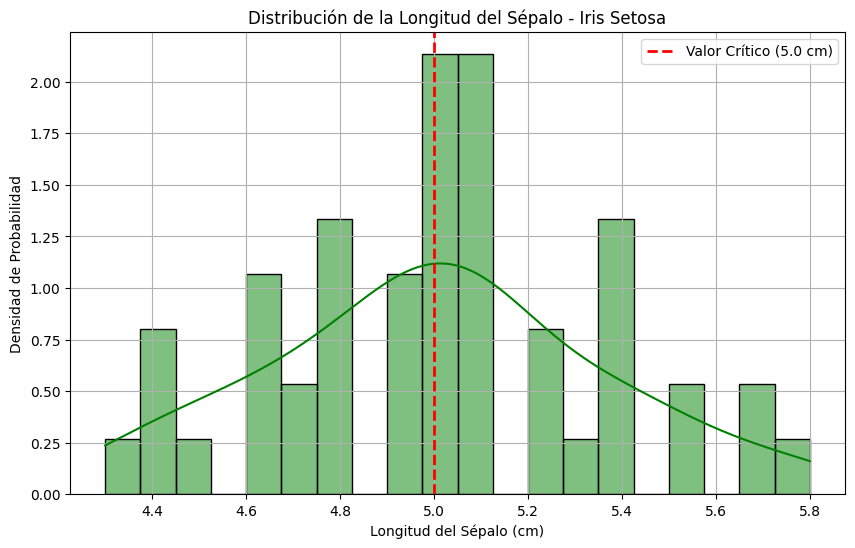

In [3]:
# para generar el estadístico de prueba...
mu_0 = 5 # valor crítico a comparar
alpha = 0.05 # nivel de significancia

# Calcular la media y el tamaño de la muestra
media_setosa = setosa['sepal_length'].mean()
n_setosa = setosa['sepal_length'].count()
sigma_setosa = setosa['sepal_length'].std()

# Realizar la prueba t de una cola
t_statistic = (media_setosa - mu_0) / (sigma_setosa / np.sqrt(n_setosa))
df = n_setosa - 1  # Grados de libertad

# Valor p de la prueba
p_value = stats.t.cdf(t_statistic, df)

# Resultados
print(f"Media de longitud del sépalo (Setosa): {media_setosa:.2f} cm")
print(f"Estadístico de Prueba (t): {t_statistic:.2f}")
print(f"Valor p: {p_value:.4f}")

# Resultado de la hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es menor que 5.0 cm.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es menor que 5.0 cm.")

# Visualización
plt.figure(figsize=(10, 6))
sns.histplot(setosa['sepal_length'], bins=20, kde=True, color='green', stat='density')
plt.axvline(mu_0, color='red', linestyle='dashed', linewidth=2, label='Valor Crítico (5.0 cm)')
plt.title('Distribución de la Longitud del Sépalo - Iris Setosa')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Por supuesto que cada vez que hacemos una prueba de hipótesis no tenemos que acordarnos de todo esto, librerías como scipy ya tienen esto incluido y solo tenemos que personalizar adecuadamente la prueba

In [9]:
# Valor crítico para la prueba
mu_0 = 7.5
alpha = 0.05

# Realizar la prueba t de una cola con statsmodels
t_test_result = stats.ttest_1samp(setosa['sepal_length'], mu_0, alternative='less') # aqui especificamos dentro de alternative qué sentido de la prueba de hipótesis queremos hacer
print(t_test_result)
# Extraer el estadístico t y el valor p
t_statistic = t_test_result[0]
p_value = t_test_result[1]



TtestResult(statistic=np.float64(-50.030522203940144), pvalue=np.float64(4.996266558328914e-44), df=np.int64(49))


Media de longitud del sépalo (Setosa): 5.01 cm
Estadístico de Prueba (t): -50.03
Valor p (prueba de 1 cola): 0.0000
Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es menor que 5.0 cm.


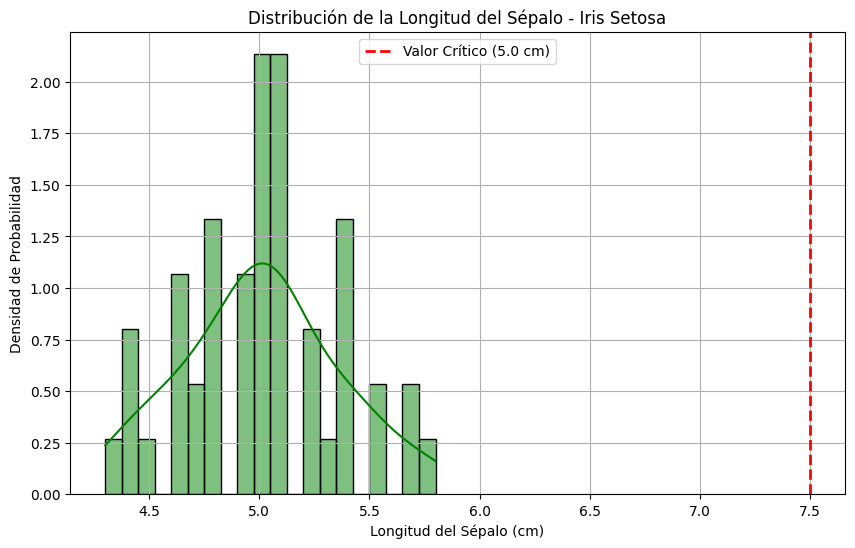

In [10]:
# Resultados
print(f"Media de longitud del sépalo (Setosa): {setosa['sepal_length'].mean():.2f} cm")
print(f"Estadístico de Prueba (t): {t_statistic:.2f}")
print(f"Valor p (prueba de 1 cola): {p_value:.4f}")

# Resultado de la hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es menor que 5.0 cm.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es menor que 5.0 cm.")

# Visualización
plt.figure(figsize=(10, 6))
sns.histplot(setosa['sepal_length'], bins=20, kde=True, color='green', stat='density')
plt.axvline(mu_0, color='red', linestyle='dashed', linewidth=2, label='Valor Crítico (5.0 cm)')
plt.title('Distribución de la Longitud del Sépalo - Iris Setosa')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

## 2a prueba de hipótesis
H0: la longitud del sepalo de la especie setosa es igual a 5
H1: la longitud del sepalo de la especie setoga es distinto de 5

In [16]:
# Valor crítico para la prueba
mu_0 = 5.0
alpha = 0.05

# Realizar la prueba t de una cola con statsmodels
t_statistic, p_value = stats.ttest_1samp(setosa['sepal_length'], mu_0, alternative='two-sided') # aqui especificamos dentro de alternative qué sentido de la prueba de hipótesis queremos hacer

# Extraer el estadístico t y el valor p
#t_statistic = t_test_result[0]
#p_value = t_test_result[1]



Media de longitud del sépalo (Setosa): 5.01 cm
Estadístico de Prueba (t): 0.12
Valor p (prueba de 2 colas): 0.9047
No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es distinta que 5.0 cm.


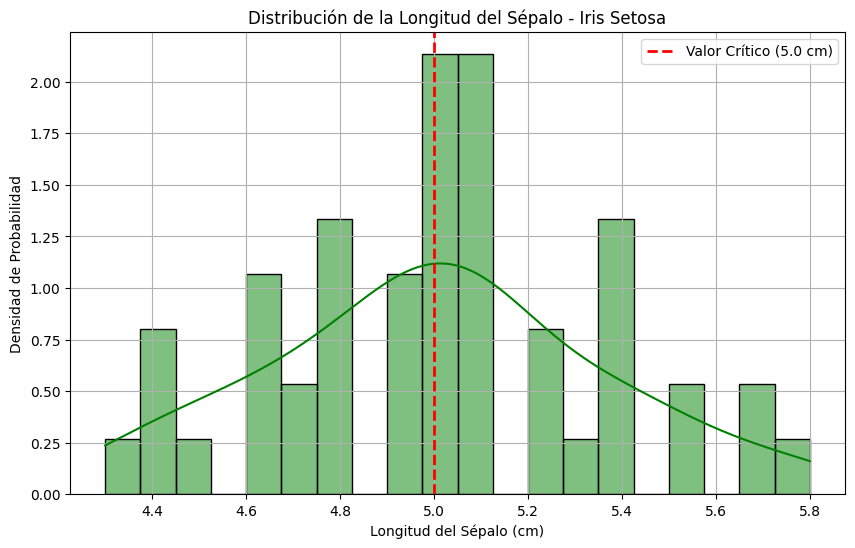

In [17]:
# Resultados
print(f"Media de longitud del sépalo (Setosa): {setosa['sepal_length'].mean():.2f} cm")
print(f"Estadístico de Prueba (t): {t_statistic:.2f}")
print(f"Valor p (prueba de 2 colas): {p_value:.4f}")

# Resultado de la hipótesis
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es distinta que 5.0 cm.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la longitud promedio del sépalo de Iris Setosa es distinta que 5.0 cm.")

# Visualización
plt.figure(figsize=(10, 6))
sns.histplot(setosa['sepal_length'], bins=20, kde=True, color='green', stat='density')
plt.axvline(mu_0, color='red', linestyle='dashed', linewidth=2, label='Valor Crítico (5.0 cm)')
plt.title('Distribución de la Longitud del Sépalo - Iris Setosa')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# 3a prueba de hipótesis: comparación de medias entre poblaciones
H0: La diferencia de medias entre las longitudes del sépalo de Iris Setosa e Iris Virginica es igual a cero (no hay diferencia) vs  
H1: La diferencia de medias entre las longitudes del sépalo de Iris Setosa e Iris Virginica no es igual a cero (hay diferencia)

In [14]:
# generamos también el dataframe para virginica
virginica = iris[iris.species == "virginica"]
virginica

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [18]:
# Realizar la prueba t de dos muestras
t_statistic, p_value = stats.ttest_ind(setosa['sepal_length'], virginica['sepal_length'])

# Resultados
print(f"Media de longitud del sépalo (Setosa): {setosa['sepal_length'].mean():.2f} cm")
print(f"Media de longitud del sépalo (Virginica): {virginica['sepal_length'].mean():.2f} cm")
print(f"Estadístico de Prueba (t): {t_statistic:.2f}")
print(f"Valor p: {p_value:.4f}")

# Resultado de la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que hay una diferencia en la longitud promedio del sépalo entre Iris Setosa y Iris Virginica.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que hay una diferencia en la longitud promedio del sépalo entre Iris Setosa y Iris Virginica.")


Media de longitud del sépalo (Setosa): 5.01 cm
Media de longitud del sépalo (Virginica): 6.59 cm
Estadístico de Prueba (t): -15.39
Valor p: 0.0000
Rechazamos la hipótesis nula: hay evidencia suficiente para afirmar que hay una diferencia en la longitud promedio del sépalo entre Iris Setosa y Iris Virginica.


C:\Users\alonso.sandoval\AppData\Local\Temp\ipykernel_16596\3500286682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y='sepal_length', palette="Set2")


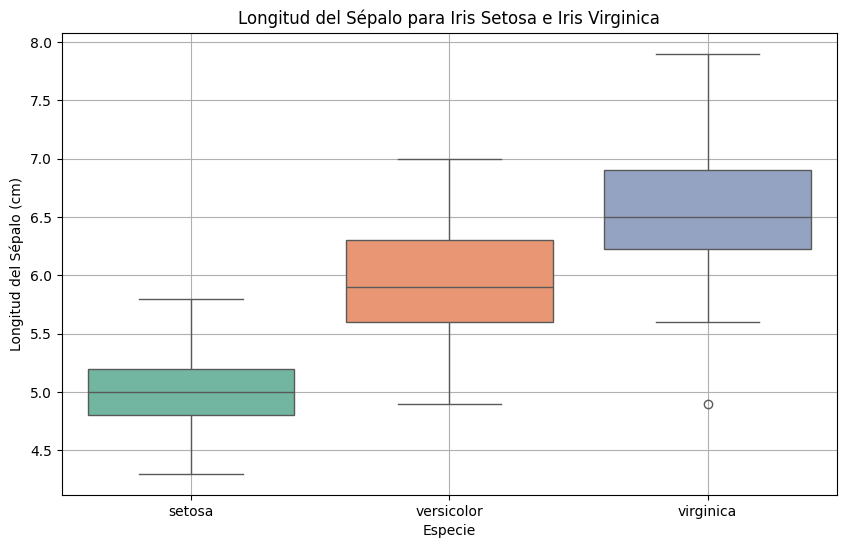

In [19]:
# Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='sepal_length', palette="Set2")
plt.title('Longitud del Sépalo para Iris Setosa e Iris Virginica')
plt.xlabel('Especie')
plt.ylabel('Longitud del Sépalo (cm)')
plt.grid(True)
plt.show()